In [1]:
import numpy as np
import pandas as pd
import sqlite3

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from matplotlib.widgets import Slider, Button

In [2]:
con = sqlite3.connect("../database.db")
df = pd.read_sql_query("SELECT * from solutions", con)
con.close()

In [3]:
init_iteration = 0
x = df.dim_0.values
y = df.dim_1.values
z = df.fitness.values
c = df.iteration_step

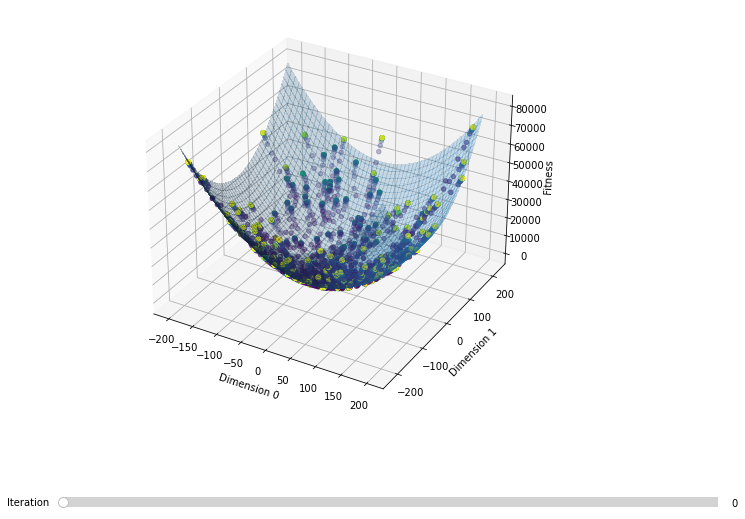

In [4]:
X = np.arange(-200, 200, 0.25)
Y = np.arange(-200, 200, 0.25)
X, Y = np.meshgrid(X, Y)
Z = ((X * X) + (Y * Y))
fig, ax = plt.subplots(figsize =(14, 9),subplot_kw={"projection": "3d"})
ax.set_xlabel('Dimension 0')
ax.set_ylabel('Dimension 1')
ax.set_zlabel('Fitness')
ax.plot_surface(X, Y, Z, linewidth=0, antialiased=False, alpha=0.2)
fig.subplots_adjust(bottom=0.25)

ax_iteration = fig.add_axes([0.25, 0.1, 0.65, 0.03])
iteration_slider = Slider(
    ax=ax_iteration,
    label='Iteration',
    valmin=min(c),
    valmax=max(c),
    valinit=init_iteration,
)
def update(val):
    line.set_ydata(f(t, amp_slider.val, freq_slider.val))
    fig.canvas.draw_idle()
iteration_slider.on_changed(update)

 
ax.scatter(x,y,1/z, c=c)
plt.show()

In [5]:
for i in range(1, 101):
    X = np.arange(-200, 200, 10)
    Y = np.arange(-200, 200, 10)
    X, Y = np.meshgrid(X, Y)
    Z = ((X * X) + (Y * Y))
    fig, ax = plt.subplots(figsize =(14, 9),subplot_kw={"projection": "3d"})
    ax.set_xlabel('Dimension 0')
    ax.set_ylabel('Dimension 1')
    ax.set_zlabel('Fitness')
    ax.set_title(f"Iteartion {i}")
    ax.plot_surface(X, Y, Z, linewidth=0, antialiased=False, alpha=0.1)

    x = df[df.iteration_step == i].dim_0.values
    y = df[df.iteration_step == i].dim_1.values
    z = df[df.iteration_step == i].fitness.values
    ax.scatter(x,y,1/z)
    plt.savefig(f'./gif/frame-{i:05}.png')
    plt.close()

ValueError: 'c' argument has 10000 elements, which is inconsistent with 'x' and 'y' with size 0.

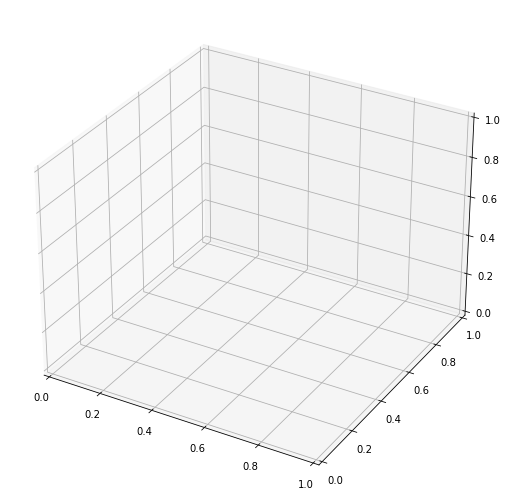

In [6]:
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.scatter(x, y, z, c=c, cmap='inferno')
plt.show()

In [ ]:
mean_fitness = df.groupby(['iteration_step']).mean().fitness.values
iterations = np.arange(1, len(mean_fitness) + 1)

fig = plt.figure(figsize =(14, 9))
ax = plt.axes()

ax.plot(mean_fitness)
#ax.set_yscale('log')